In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

          toi        tid tfopwg_disp         rastr          ra         decstr  \
10     101.01  231663901          KP  21h14m56.88s  318.737012  -55d52m18.71s   
12    1011.01  114018671          PC  07h35m56.34s  113.984761   -32d50m31.2s   
29    1027.01   20318757          PC  11h08m31.99s  167.133275  -29d39m11.29s   
30    1027.02   20318757          PC  11h08m31.99s  167.133275  -29d39m11.29s   
31    1027.03   20318757          PC  11h08m31.99s  167.133275  -29d39m11.29s   
...       ...        ...         ...           ...         ...            ...   
7326   954.01   44792534          CP  04h07m45.85s   61.941059  -25d12m31.69s   
7330   958.01   92880568         APC   05h32m51.8s   83.215825  -19d34m30.26s   
7335   963.01   25799609          PC  07h56m35.83s  119.149300  -00d46m22.26s   
7341   969.01  280437559          CP   07h40m32.8s  115.136686  +02d05m54.92s   
7342   970.01  174599051          PC  07h38m47.76s  114.699006  -39d08m07.86s   

            dec  st_pmra  s

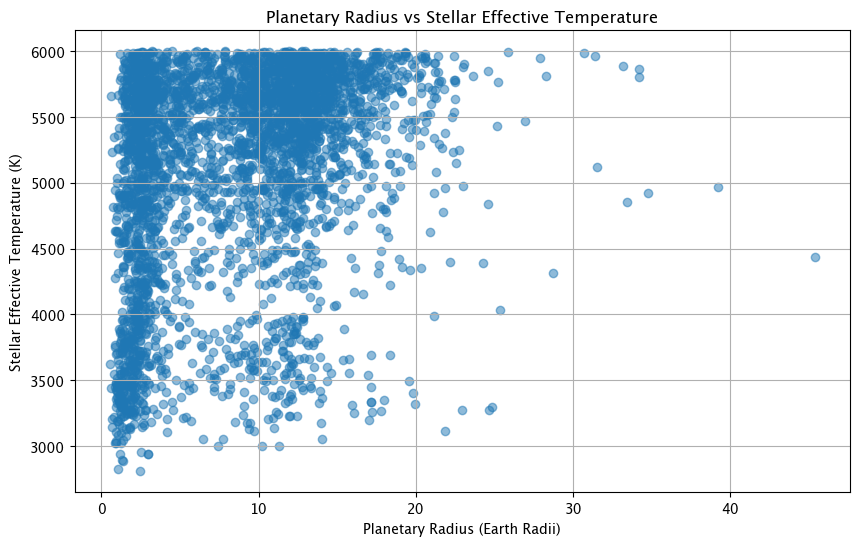

In [2]:
df = pd.read_csv('TOI_Mar2025.csv', skiprows=71)
df = df[df['st_teff'] < 6000]
df = df[df['tfopwg_disp'] != 'FP']

print(df)

# Plot pl_rade vs st_teff
plt.figure(figsize=(10, 6))
plt.scatter(df['pl_rade'],df['st_teff'], alpha=0.5)
plt.title('Planetary Radius vs Stellar Effective Temperature')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.grid(True)
plt.show()

7525

383
KeyError: 'pl_name'
383


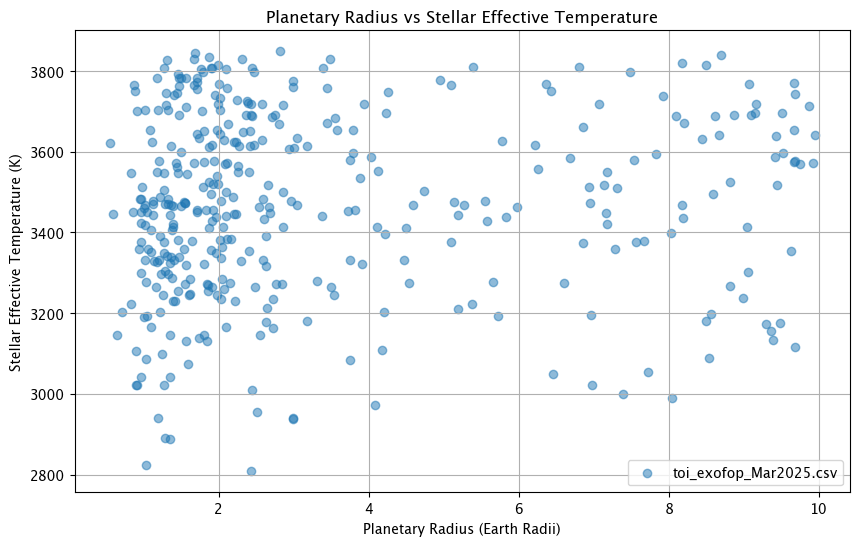

KeyError: 'pl_name'


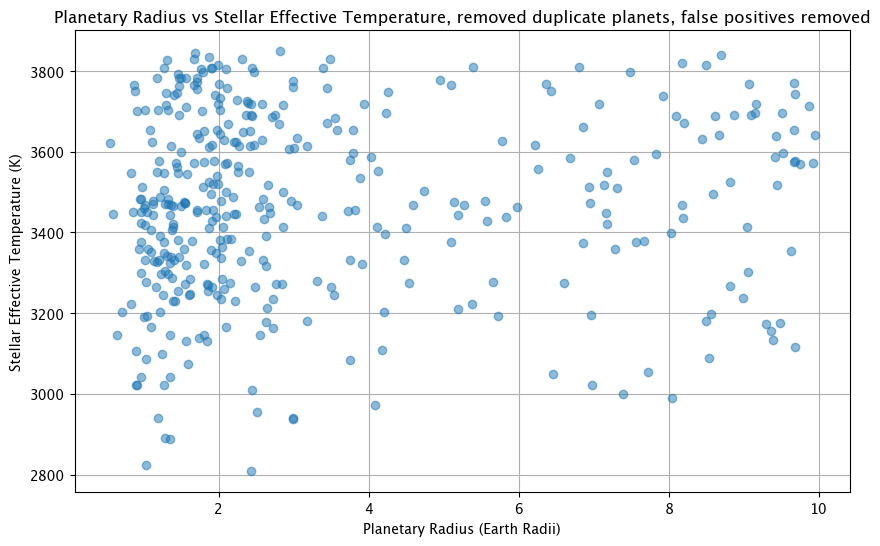

In [26]:
import re

files_and_skiprows = [
    #('K2_confirmed_Mar2025.csv', 103),
    #('TESS_confirmed_Mar2025.csv', 104),
    #('K2OI_Mar2025.csv', 105),
    #('Kepler_confirmed_Mar2025.csv', 103),
    #('All_confirmed_Mar2025.csv', 102),
    #('TOI_Mar2025.csv', 71),
    #('40k_Mar2025.csv', 96),
    ('toi_exofop_Mar2025.csv',0), #CTOIs might be different, K2 and Kepler are different
    ]

df_combined = pd.DataFrame()
plt.figure(figsize=(10, 6))

for file, skip in files_and_skiprows:
    df = pd.read_csv(file, skiprows=skip)
    print(len(df))

    if 'Stellar Eff Temp (K)' in df.columns:
        df.rename(columns={'Stellar Eff Temp (K)': 'st_teff'}, inplace=True)
    if 'Planet Radius (R_Earth)' in df.columns:
        df.rename(columns={'Planet Radius (R_Earth)': 'pl_rade'}, inplace=True)
    #print(df.columns)
    df = df.dropna(subset=['st_teff', 'pl_rade'])
    #print(((df['pl_rade'])))

    df = df[df['st_teff'] < 3850]
    df = df[df['st_teff'] > 2500]
    df = df[df['pl_rade'] < 10]
    
    if 'tfopwg_disp' in df.columns:
        df = df[df['tfopwg_disp'] != 'FP']
    
    df_combined = pd.concat([df_combined, df], ignore_index=True)


    plt.scatter(df['pl_rade'], df['st_teff'], alpha=0.5, label=file)
    if 'pl_name' in df.columns:
        for i, txt in enumerate(df['pl_name']):
            plt.annotate(txt, (df['pl_rade'].iloc[i], df['st_teff'].iloc[i]), fontsize=8, alpha=0.7)

 
#FILTER OUT SAME PLANET ONES (not specified exactly how)
print('')
print(len(df_combined))
#print((df_combined['pl_name']))
df_combined.rename(columns={'tid': 'tic_id'}, inplace=True)
df_combined.rename(columns={'TIC ID': 'tic_id'}, inplace=True)
#need to remove the word tic from soem of them


#print(df_combined['pl_name'])
try:
    df_combined = df_combined[df_combined['pl_name'].isnull() | ~df_combined[df_combined['pl_name'].notnull()].duplicated(subset='pl_name', keep='first')]
except KeyError as e:
    print(f"KeyError: {e}")

print(len(df_combined))
#we don't want to remove all same tic ids because some stars host multiple planets

plt.title('Planetary Radius vs Stellar Effective Temperature')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(df_combined['pl_rade'], df_combined['st_teff'], 'o', alpha=0.5,)
plt.title('Planetary Radius vs Stellar Effective Temperature, removed duplicate planets, false positives removed')
try:
    for i, txt in enumerate(df_combined['pl_name']):
        plt.annotate(txt, (df_combined['pl_rade'].iloc[i], df_combined['st_teff'].iloc[i]), fontsize=8, alpha=0.7)
except KeyError as e:
    print(f"KeyError: {e}")
plt.ylabel('Stellar Effective Temperature (K)')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.grid(True)
#plt.legend()
plt.show()

#Why are there fewer planets in 40k alone than when adding the other files? TOI adds one more?? weirdly

#use the default planet table for the confirmed planets

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_26202/1675760250.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined['st_teff_bin'] = pd.cut(df_combined['st_teff'], bins)


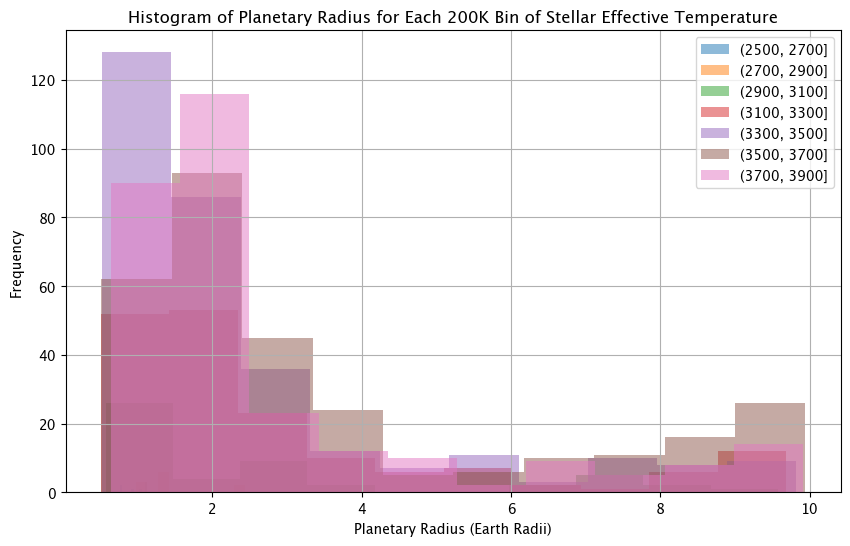

In [4]:
# Define the bins for the histogram
bins = range(2500, 3901, 200)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the histogram
df_combined['st_teff_bin'] = pd.cut(df_combined['st_teff'], bins)
df_combined.groupby('st_teff_bin')['pl_rade'].plot(kind='hist', alpha=0.5, legend=True)

# Add titles and labels
plt.title('Histogram of Planetary Radius for Each 200K Bin of Stellar Effective Temperature')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Number of objects in bin 3700-3900K: 291
Number of objects in bin 3500-3700K: 301
Number of objects in bin 3300-3500K: 311
Number of objects in bin 3100-3300K: 167
Number of objects in bin 2900-3100K: 50
Number of objects in bin 2700-2900K: 11
Number of objects in bin 2500-2700K: 7


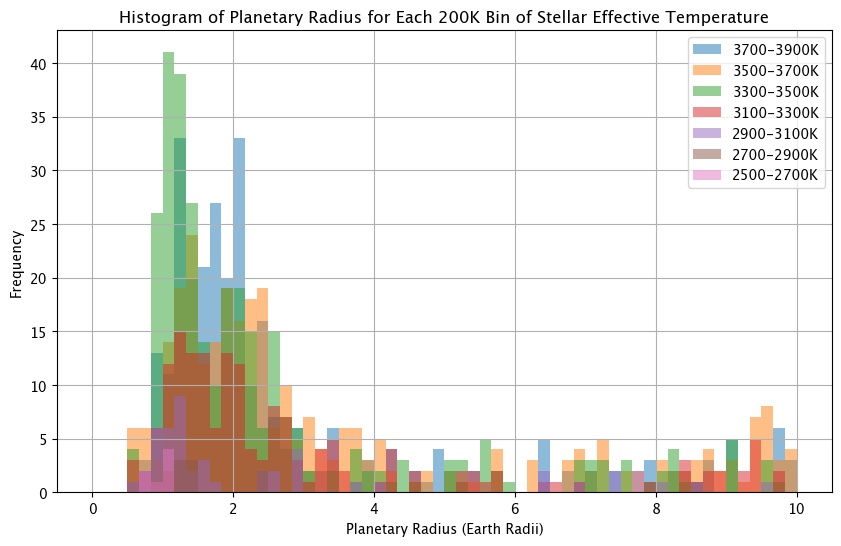

In [ ]:
# Define the bins for the histogram
bins = range(2500, 3900, 200)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the histogram
df_combined['st_teff_bin'] = pd.cut(df_combined['st_teff'], bins)
for bin_start in reversed(bins):
    bin_end = bin_start + 200
    df_bin = df_combined[(df_combined['st_teff'] >= bin_start) & (df_combined['st_teff'] < bin_end)]
    #print(df_bin)
    if not df_bin.empty:
        df_bin['pl_rade'].plot(kind='hist', alpha=0.5, bins=60, range=(0, 10), label=f'{bin_start}-{bin_end}K')
        print(f"Number of objects in bin {bin_start}-{bin_end}K: {len(df_bin)}")
    plt.legend()

# Add titles and labels
plt.title('Histogram of Planetary Radius for Each 200K Bin of Stellar Effective Temperature')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#can probably detect mini-neptunes around all of our m dwarfs, where super-earths are more affected by bias
#look at the smallest 10% of planets for different effective temperatures, looking for the smallest planet average size and where it occurs at each teff bin

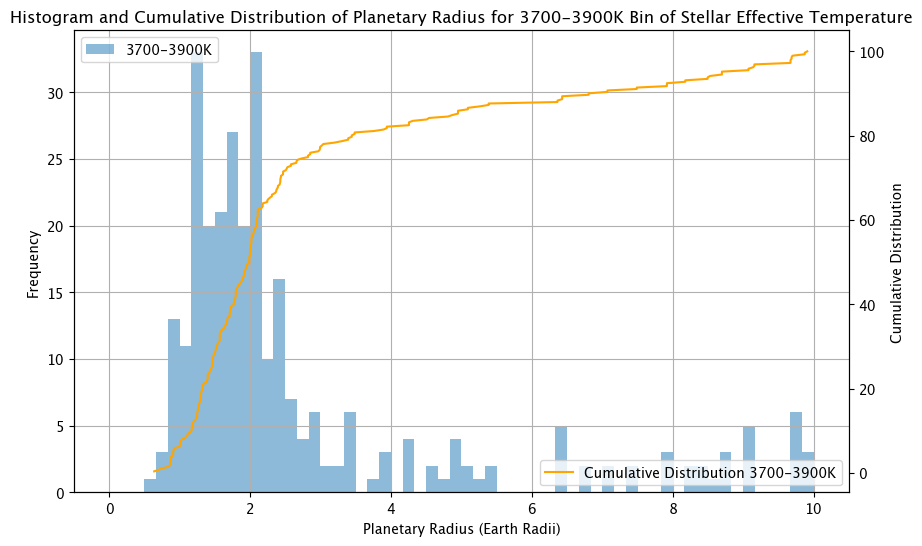

Number of objects in bin 3700-3900K: 291
KS Statistic: 0.07356609231847033, P-value: 0.15356836529348317


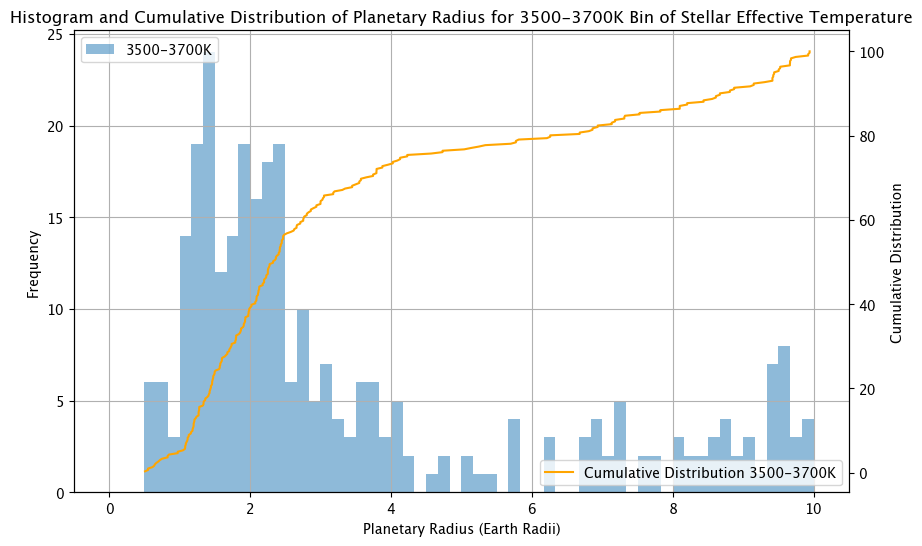

Number of objects in bin 3500-3700K: 301
KS Statistic: 0.14817918012016185, P-value: 4.970745069876603e-05


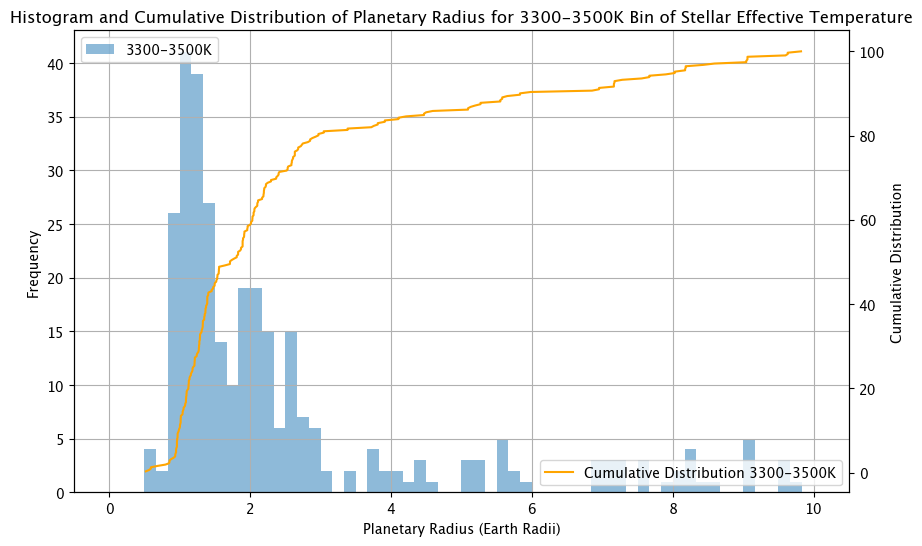

Number of objects in bin 3300-3500K: 311
KS Statistic: 0.1271254923456846, P-value: 0.0006637644971191348


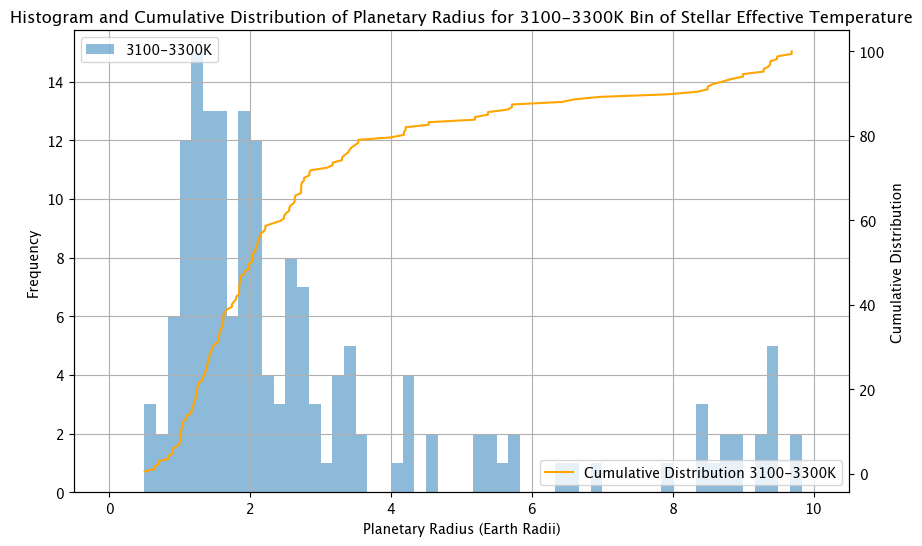

Number of objects in bin 3100-3300K: 167
KS Statistic: 0.05936983677635941, P-value: 0.6586541538546469


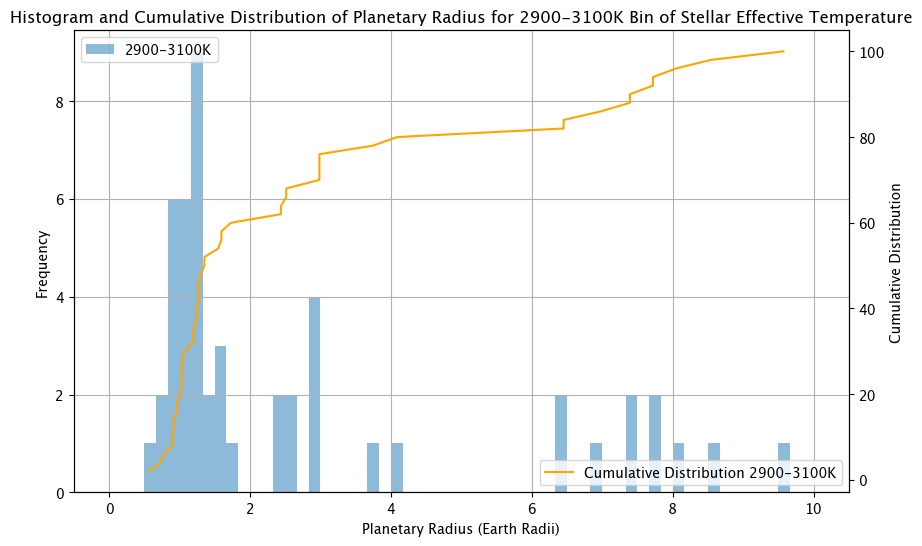

Number of objects in bin 2900-3100K: 50
KS Statistic: 0.24934973637961336, P-value: 0.004128439400599371


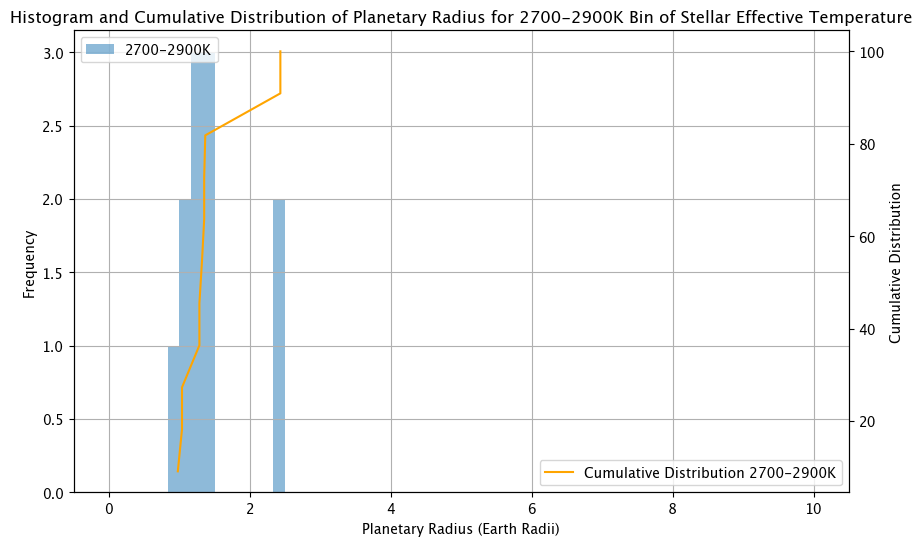

Number of objects in bin 2700-2900K: 11
KS Statistic: 0.5405016775842786, P-value: 0.00166582255221559


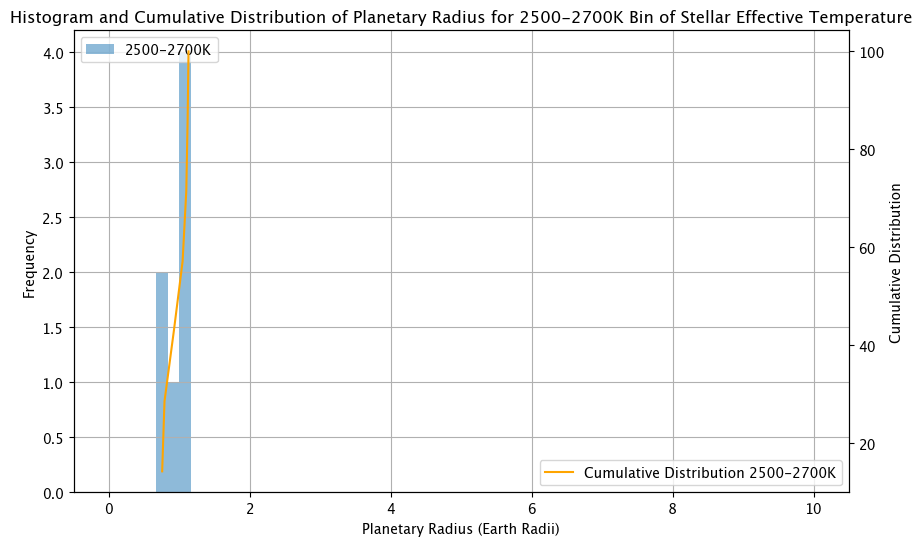

Number of objects in bin 2500-2700K: 7
KS Statistic: 0.8550087873462214, P-value: 3.1071768300527935e-06


In [12]:
from scipy.stats import ks_2samp

# Define the bins for the histogram
bins = range(2500, 3900, 200)

# Plot the histogram and KS test cumulative distribution
df_combined['st_teff_bin'] = pd.cut(df_combined['st_teff'], bins)
for bin_start in reversed(bins):
    bin_end = bin_start + 200
    df_bin = df_combined[(df_combined['st_teff'] >= bin_start) & (df_combined['st_teff'] < bin_end)]
    if not df_bin.empty:
        fig, ax1 = plt.subplots(figsize=(10, 6))
        
        # Plot histogram
        df_bin['pl_rade'].plot(kind='hist', alpha=0.5, bins=60, range=(0, 10), label=f'{bin_start}-{bin_end}K', ax=ax1)
        ax1.set_xlabel('Planetary Radius (Earth Radii)')
        ax1.set_ylabel('Frequency')
        ax1.legend(loc='upper left')
        
        # Create a second y-axis for the cumulative distribution
        ax2 = ax1.twinx()
        
        # Perform KS test - I'm pretty sure this isn't right, it just compares the df with the bins??
        #ks_stat, p_value = ks_2samp(df_combined['pl_rade'].dropna(), df_bin['pl_rade'].dropna())
        
        # Plot cumulative distribution
        sorted_data = np.sort(df_bin['pl_rade'].dropna())
        cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
        ax2.plot(sorted_data, cdf * 100 , label=f'Cumulative Distribution {bin_start}-{bin_end}K', color='orange')
        ax2.set_ylabel('Cumulative Distribution')
        ax2.legend(loc='lower right')
        
        plt.title(f'Histogram and Cumulative Distribution of Planetary Radius for {bin_start}-{bin_end}K Bin of Stellar Effective Temperature')
        ax1.grid(True)
        plt.show()
        
        print(f"Number of objects in bin {bin_start}-{bin_end}K: {len(df_bin)}")
        print(f"KS Statistic: {ks_stat}, P-value: {p_value}")



In [7]:
print((df_combined['pl_rade'].dropna()))
print((df_bin['pl_rade'].dropna()))

0       1.047000
1       1.000000
2       1.100000
3       1.900000
4       1.790000
          ...   
2686    3.537073
2687    6.853980
2688    8.821190
2689    6.957100
2690    5.982460
Name: pl_rade, Length: 1138, dtype: float64
642    1.116
643    1.097
644    0.788
645    0.920
646    1.045
647    1.129
648    0.755
Name: pl_rade, dtype: float64
